# Jonathan Halverson
# Tuesday, October 31, 2017
# Geron Chapter 10

ANN are at the heart of deep neurel networks, CNN's and recurrent NN's. They can be used for highly complex tasks such as image classification, speech recognition, recommendation engines or beating the world champion at Go. We first cover the perceptron and then use a multilayer perceptron to classify the MNIST data set in Tensorflow

The perceptron is one of the simplest ANN architectures (invented by Frank Rosenblatt). It is based on a LTU or linear threshold unit: step(w_1 x_1 + w_2 x_2 + ... + w_n x_n + b), where step is the Heaviside step function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

(0, 3)

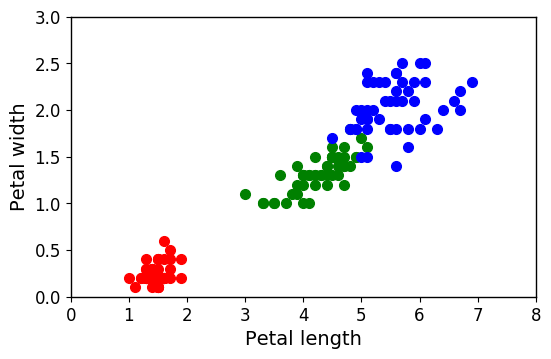

In [3]:
for clr, cls in zip(['red', 'green', 'blue'], np.unique(y)):
     plt.plot(X[y == cls, 0], X[y == cls, 1], 'o', color=clr)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(0, 8)
plt.ylim(0, 3)

The following should fail miserably since the perceptron only converges for linearly separable data:

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

In [5]:
std_sc = StandardScaler()
X_std = std_sc.fit_transform(X)

In [6]:
X_std.mean(axis=0), X_std.var(axis=0)

(array([  3.31586610e-16,  -2.84217094e-16]), array([ 1.,  1.]))

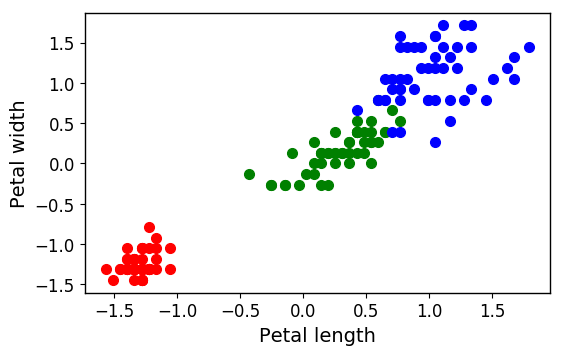

In [7]:
for clr, cls in zip(['red', 'green', 'blue'], np.unique(y)):
     plt.plot(X_std[y == cls, 0], X_std[y == cls, 1], 'o', color=clr)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
#plt.xlim(0, 8)
#plt.ylim(0, 3)

In [8]:
#per_clf = Perceptron(random_state=142, tol=1e-3)
per_clf = Perceptron(random_state=142)
per_clf.fit(X_std, y)

TypeError: __init__() got an unexpected keyword argument 'tol'

In [ ]:
per_clf.score(X_std, y)

We see that the accuracy is low. This is because the algorithm never converged so the resulting fits are not meaningful.

In [ ]:
std_sc.transform([[6.1, 2.0]])

In [ ]:
per_clf.predict(std_sc.transform([[6.1, 2.0]]))

In [ ]:
per_clf.predict(std_sc.transform([[1.5, 0.25]]))

In [ ]:
per_clf.predict(std_sc.transform([[4.0, 1.25]]))

In [ ]:
per_clf.coef_

In [ ]:
per_clf.intercept_

### High-level API

In [1]:
import tensorflow as tf

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
X_train, y_train = digits.data, digits.target

In [8]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11b3f6b10>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving

SKCompat()